In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Question:
A textile company regularly spent money on five advertising companies for their adds.

In [2]:
data= pd.read_csv(r"C:\Users\admin\Desktop\Add_sales_data_2018 (1).csv")
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,10/8/2018,208.00,222.25,206.85,216.00,215.15,4093.065
1,10/5/2018,217.00,218.60,205.90,210.25,209.20,4042.448
2,10/4/2018,223.50,227.80,216.15,217.25,218.20,4213.819
3,10/3/2018,230.00,237.50,225.75,226.45,227.60,4391.665
4,10/1/2018,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
data.shape

(205, 7)

In [4]:
data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


# 1.First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated

<AxesSubplot:>

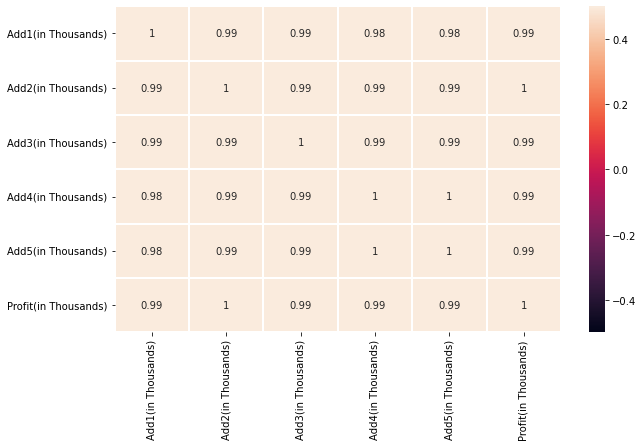

In [6]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,6))
sns.heatmap(corrmatrix,vmin = -0.5,vmax=0.5,annot= True,linewidth=0.2)

from correlation plot we can conclude that there is strong a relationship between the amount spent for advertising through five different companies and profit generated.they are highly correlated.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

the column to be predicted is profit and is a numerical continueous column.
so go for linear regression model

In [7]:
y= data['Profit(in Thousands)']
x=data.drop(['Profit(in Thousands)','Date'],axis =1)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size=0.25)

In [9]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)

In [10]:
y_test.head()

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
Name: Profit(in Thousands), dtype: float64

In [11]:
predictions

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788, 5038.222,
       5491.792, 5019.997, 4647.356, 4486.38 , 4435.174, 5300.437,
       5425.19 , 4482.183, 4193.095, 6062.457])

In [12]:
from sklearn.metrics import mean_squared_error
print('MSE is : ',mean_squared_error(y_test,predictions))

MSE is :  5.408488620539027e-25


In [13]:
from sklearn.metrics import r2_score
print('R squred value is : ',r2_score(y_test,predictions))


R squred value is :  1.0


In [14]:
print(f'intercept:{model.intercept_}')

intercept:1.8189894035458565e-12


In [15]:
c= model.intercept_
print(f'intercept:{c}')

intercept:1.8189894035458565e-12


In [16]:
m = model.coef_
print(f'slope: {m}')

slope: [ 1.   12.38  3.5   1.    0.9 ]



MSE is very close to zero. means model is a good one.
r2 value is 1.that means that he regression model covers most part of the variance of the values of the response variable and can be termed as good model.

# 3.Predict the profit generated by the company, if they wish to spend the following amount for advertisement


In [ ]:
#add1(in thousands) : 290
#add2(in thousands) : 312
#add3(in thousands) : 309
#add4(in thousands) : 298
#add5(in thousands) : 320

In [17]:
x= np.array([290,312,309,298,320]).reshape(1,-1)
x

array([[290, 312, 309, 298, 320]])

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
y_pred = model.predict(x)
y_pred

array([5820.06])

The predicted profit for the company is 5820.06